In [22]:
%load_ext autoreload
%autoreload 2

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from Utils import RMSELoss
from sklearn.metrics import r2_score

In [25]:
rmse = RMSELoss()


In [53]:
# PATH = 'baseline_results/table_2_1.csv'
PATH = 'gan_results/table_2.csv'

MODE = 2
#0 TRAIN, 1 VALID, 2 TEST

In [48]:
data = pd.read_csv(PATH)
data.head()

,Unnamed: 0,y,y_pred,mode
0,0,6.0,6.419139,0.0
1,1,6.3,6.307005,0.0
2,2,6.5,6.077039,0.0
3,3,5.4,5.972211,0.0
4,4,6.0,6.174640,0.0


In [49]:
def compute_metrics(y, y_pred, answer=None):
    if answer is None:
        answer = dict()
    answer['RMSE'] = rmse(y_pred, y)
    answer['R2'] = r2_score(y, y_pred)
    answer['MAE'] = np.mean(np.abs(y - y_pred))
    return answer

In [64]:
y_true = data.loc[data['mode'] == MODE]['y'].to_numpy()
y_pred = data.loc[data['mode'] == MODE]['y_pred'].to_numpy()

In [65]:
compute_metrics(y_true, y_pred)

{'RMSE': tensor(0.8746), 'R2': 0.5744111666561792, 'MAE': 0.6775172582517067}

Text(0.5, 1.0, 'gan_results/table_2.csv')

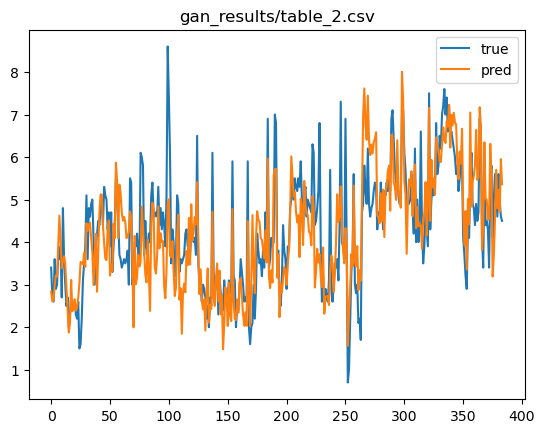

In [66]:
plt.plot(y_true, label="true")
plt.plot(y_pred, label="pred")
plt.legend()
plt.title(PATH)